In [72]:
import requests
import pandas as pd
from scipy.io import arff
import io
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multioutput import MultiOutputClassifier

In [6]:
# Load the ARFF file
y1_data = arff.loadarff('c4_data/1year.arff')

# Convert the data to a Pandas DataFrame
y1_df = pd.DataFrame(y1_data[0]).add_suffix('_y1')

In [63]:
# Load the ARFF file
y2_data = arff.loadarff('c4_data/2year.arff')

# Convert the data to a Pandas DataFrame
y2_df = pd.DataFrame(y2_data[0]).add_suffix('_y2')

In [64]:
# Load the ARFF file
y3_data = arff.loadarff('c4_data/3year.arff')

# Convert the data to a Pandas DataFrame
y3_df = pd.DataFrame(y3_data[0]).add_suffix('_y3')

In [65]:
# Load the ARFF file
y4_data = arff.loadarff('c4_data/4year.arff')

# Convert the data to a Pandas DataFrame
y4_df = pd.DataFrame(y4_data[0]).add_suffix('_y4')

In [66]:
# Load the ARFF file
y5_data = arff.loadarff('c4_data/5year.arff')

# Convert the data to a Pandas DataFrame
y5_df = pd.DataFrame(y5_data[0]).add_suffix('_y5')

In [29]:
y1_df


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


In [26]:
# Merge the dataframes into one df
data = pd.merge(y1_df, y2_df, left_index=True, right_index=True)
data = pd.merge(data, y3_df, left_index=True, right_index=True)
data = pd.merge(data, y4_df, left_index=True, right_index=True)
data = pd.merge(data, y5_df, left_index=True, right_index=True)


C:\Users\19405\AppData\Local\Temp\ipykernel_11980\2682846071.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Attr13_x', 'Attr10_x', 'Attr19_x', 'Attr43_x', 'Attr59_x', 'Attr27_x', 'Attr28_x', 'Attr24_x', 'Attr11_x', 'Attr23_x', 'Attr38_x', 'class_x', 'Attr3_x', 'Attr62_x', 'Attr20_x', 'Attr31_x', 'Attr14_x', 'Attr12_x', 'Attr35_x', 'Attr48_x', 'Attr26_x', 'Attr5_x', 'Attr6_x', 'Attr56_x', 'Attr42_x', 'Attr49_x', 'Attr4_x', 'Attr34_x', 'Attr9_x', 'Attr21_x', 'Attr54_x', 'Attr8_x', 'Attr64_x', 'Attr15_x', 'Attr55_x', 'Attr25_x', 'Attr41_x', 'Attr52_x', 'Attr29_x', 'Attr30_x', 'Attr63_x', 'Attr18_x', 'Attr1_x', 'Attr61_x', 'Attr33_x', 'Attr60_x', 'Attr57_x', 'Attr7_x', 'Attr32_x', 'Attr44_x', 'Attr51_x', 'Attr16_x', 'Attr40_x', 'Attr58_x', 'Attr45_x', 'Attr37_x', 'Attr47_x', 'Attr53_x', 'Attr39_x', 'Attr36_x', 'Attr2_x', 'Attr50_x', 'Attr17_x', 'Attr46_x', 'Attr22_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(dat

In [27]:
data = pd.merge(y1_df, y2_df, left_index=True, right_index=True)


In [28]:
data

,Attr1_x,Attr2_x,Attr3_x,Attr4_x,Attr5_x,Attr6_x,Attr7_x,Attr8_x,Attr9_x,Attr10_x,...,Attr56_y,Attr57_y,Attr58_y,Attr59_y,Attr60_y,Attr61_y,Attr62_y,Attr63_y,Attr64_y,class_y
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.013912,0.096154,0.98676,0.000000,51.4310,5.02610,75.435,4.83860,6.9211,b'0'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,0.026530,0.010931,0.99291,0.104640,23.4710,5.35680,89.976,4.05660,1.1389,b'0'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.000727,0.035240,0.99927,0.047888,2.0825,4.61440,121.720,2.99860,1.3941,b'0'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,0.150080,0.173420,0.84992,0.000000,15.2340,6.52450,17.512,20.84300,4.3843,b'0'


### New Data import

In [36]:
import pandas as pd
from scipy.io import arff
import requests
from io import StringIO


In [37]:
# GitHub URL of the ARFF file
file_urls = [
    'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/c4_data/1year.arff',
    'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/c4_data/2year.arff',
    'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/c4_data/3year.arff',
    'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/c4_data/4year.arff',
    'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/c4_data/5year.arff'
]


In [54]:
# Initialize a list to store DataFrames for each file
dfs = []


# Load each ARFF file and store it in a DataFrame with unique column names
for i, url in enumerate(file_urls):
    response = requests.get(url)
    data = response.text
    data_io = StringIO(data)
    df, meta = arff.loadarff(data_io)
    df = pd.DataFrame(df)
    
    # Rename the columns to distinguish them by file
    df = df.rename(columns={col: f'{col}_y{i+1}' for col in df.columns})
    
    # Store the DataFrame in the list
    dfs.append(df)

# Merge the DataFrames based on the index
merged_df = dfs[0]
for i in range(1, len(dfs)):
    merged_df = pd.merge(merged_df, dfs[i], left_index=True, right_index=True)

    
merged_df

,Attr1_y1,Attr2_y1,Attr3_y1,Attr4_y1,Attr5_y1,Attr6_y1,Attr7_y1,Attr8_y1,Attr9_y1,Attr10_y1,...,Attr56_y5,Attr57_y5,Attr58_y5,Attr59_y5,Attr60_y5,Attr61_y5,Attr62_y5,Attr63_y5,Attr64_y5,class_y5
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.388250,0.249760,1.33050,1.1389,0.504940,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.000000,0.258340,0.99601,1.6996,0.497880,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.000000,0.309060,0.43695,1.3090,0.304080,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.149880,0.092704,1.86610,1.0571,0.573530,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.187320,0.187320,0.63070,1.1559,0.386770,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.011007,0.30894,0.049314,1.27610,-43.6320,0.000000,0.024241,2.23690,1.0090,0.691060,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.436320,0.90119,-0.142970,0.84135,-44.8010,-0.141380,-0.436320,0.10964,3.4018,0.098808,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,0.025200,0.79799,-0.102750,0.86431,-20.1340,0.005218,0.044988,0.25316,4.6587,0.202010,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,0.114830,0.65498,0.038916,1.06670,-53.0660,0.116150,0.122610,0.40355,1.1079,0.264320,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [55]:
#Verify Column Headers 
column_headers = merged_df.columns.tolist()
print(column_headers)

['Attr1_y1', 'Attr2_y1', 'Attr3_y1', 'Attr4_y1', 'Attr5_y1', 'Attr6_y1', 'Attr7_y1', 'Attr8_y1', 'Attr9_y1', 'Attr10_y1', 'Attr11_y1', 'Attr12_y1', 'Attr13_y1', 'Attr14_y1', 'Attr15_y1', 'Attr16_y1', 'Attr17_y1', 'Attr18_y1', 'Attr19_y1', 'Attr20_y1', 'Attr21_y1', 'Attr22_y1', 'Attr23_y1', 'Attr24_y1', 'Attr25_y1', 'Attr26_y1', 'Attr27_y1', 'Attr28_y1', 'Attr29_y1', 'Attr30_y1', 'Attr31_y1', 'Attr32_y1', 'Attr33_y1', 'Attr34_y1', 'Attr35_y1', 'Attr36_y1', 'Attr37_y1', 'Attr38_y1', 'Attr39_y1', 'Attr40_y1', 'Attr41_y1', 'Attr42_y1', 'Attr43_y1', 'Attr44_y1', 'Attr45_y1', 'Attr46_y1', 'Attr47_y1', 'Attr48_y1', 'Attr49_y1', 'Attr50_y1', 'Attr51_y1', 'Attr52_y1', 'Attr53_y1', 'Attr54_y1', 'Attr55_y1', 'Attr56_y1', 'Attr57_y1', 'Attr58_y1', 'Attr59_y1', 'Attr60_y1', 'Attr61_y1', 'Attr62_y1', 'Attr63_y1', 'Attr64_y1', 'class_y1', 'Attr1_y2', 'Attr2_y2', 'Attr3_y2', 'Attr4_y2', 'Attr5_y2', 'Attr6_y2', 'Attr7_y2', 'Attr8_y2', 'Attr9_y2', 'Attr10_y2', 'Attr11_y2', 'Attr12_y2', 'Attr13_y2', 'Att

In [56]:
merged_df['b'] = merged_df[['class_y1', 'class_y2', 'class_y3', 'class_y4', 'class_y5']].astype(int).max(axis=1)


In [64]:
# Count NaN values in the entire DataFrame
nan_count_df = merged_df.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {nan_count_df}")

Total NaN values in the DataFrame: 27864


In [65]:
# Count NaN values per column in the DataFrame
nan_counts = merged_df.isna().sum()

# Filter and display columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]
print(columns_with_nan)


Attr1_y1       3
Attr2_y1       3
Attr3_y1       3
Attr4_y1      26
Attr5_y1       8
            ... 
Attr59_y5      3
Attr60_y5    268
Attr61_y5     15
Attr63_y5     21
Attr64_y5    107
Length: 249, dtype: int64


In [67]:
# imputation
# Impute missing data with the mean of each column
imputed_df = merged_df.fillna(merged_df.mean())

# Count NaN values in the entire DataFrame
nan_count_df_new = imputed_df.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {nan_count_df_new}")

Total NaN values in the DataFrame: 0


In [68]:
# Split data into features (X) and multiple targets (y)
X = imputed_df.drop(columns='b')
y = imputed_df['b']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=10, n_estimators=10, n_jobs= -1)

# Create Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the Grid Search
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score:  0.9913281206304463


|--- Attr48_y5 <= -0.16
|   |--- Attr45_y5 <= -0.34
|   |   |--- Attr11_y5 <= -0.17
|   |   |   |--- Attr23_y2 <= 0.11
|   |   |   |   |--- Attr13_y4 <= 0.15
|   |   |   |   |   |--- Attr62_y1 <= 26.74
|   |   |   |   |   |   |--- Attr61_y2 <= 8.96
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Attr61_y2 >  8.96
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Attr62_y1 >  26.74
|   |   |   |   |   |   |--- Attr56_y1 <= 0.22
|   |   |   |   |   |   |   |--- Attr2_y1 <= 0.58
|   |   |   |   |   |   |   |   |--- class_y5 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- class_y5 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Attr2_y1 >  0.58
|   |   |   |   |   |   |   |   |--- Attr60_y4 <= 17.43
|   |   |   |   |   |   |   |   |   |--- Attr55_y5 <= -1333.27
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |-

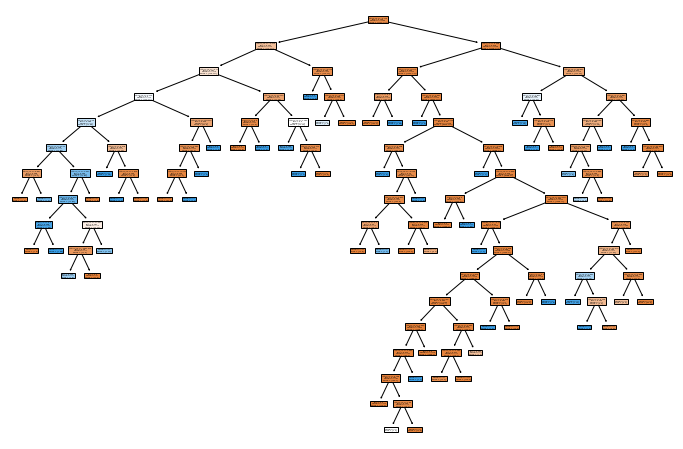

In [69]:
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1. Train a Random Forest Classifier with the best parameters
best_params = grid_search.best_params_
rf_classifier_best = RandomForestClassifier(
    random_state=10,
    n_estimators=10,
    n_jobs=-1,
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

rf_classifier_best.fit(X_train, y_train)

# 2. Extract one of the decision trees from the trained Random Forest
tree_index = 0  # Change this index to select a different tree
selected_tree = rf_classifier_best.estimators_[tree_index]

# 3. Visualize the selected decision tree
tree_text = export_text(selected_tree, feature_names=X_train.columns.tolist())
print(tree_text)

# Optionally, you can plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(selected_tree, filled=True, feature_names=X_train.columns.tolist())
plt.show()


In [70]:

# Define the target variables for classification
target_variables = ['class_y1', 'class_y2', 'class_y3', 'class_y4', 'class_y5']  # Add all desired target variables

# Split data into features (X) and multiple targets (y)
X2 = imputed_df.drop(columns=target_variables)
y2 = imputed_df[target_variables]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)



In [77]:
# Create a MultiOutputClassifier with a Random Forest Classifier as the base estimator
clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


ValueError: Found input variables with inconsistent numbers of samples: [4728, 5]

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the target variables for classification
target_variables = ['class_y1', 'class_y2', 'class_y3', 'class_y4', 'class_y5']  # Add all desired target variables

# Split data into features (X) and multiple targets (y)
X2 = imputed_df.drop(columns=target_variables)
y2 = imputed_df[target_variables]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a dictionary to store individual classifiers
clf_dict = {}

# Train a Random Forest Classifier for each target variable
for target_var in target_variables:
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train[target_var])
    clf_dict[target_var] = clf

# Make predictions on the test data for each target variable
y_pred_dict = {target_var: clf.predict(X_test) for target_var, clf in clf_dict.items()}

# Evaluate each classifier and print the results
for target_var, clf in clf_dict.items():
    accuracy = accuracy_score(y_test[target_var], y_pred_dict[target_var])
    classification_report_str = classification_report(y_test[target_var], y_pred_dict[target_var])
    
    print(f"Target Variable: {target_var}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report_str)


ValueError: Unknown label type: 'unknown'

In [84]:
from sklearn.preprocessing import LabelEncoder

# Example for a single target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train[target_var])
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

#### Original Data Cont

In [34]:
data['b'] = data[['class_y1', 'class_y2', 'class_y3', 'class_y4', 'class_y5']].astype(int).max(axis=1)


In [85]:
nan_data = data[data['b'].isna()]
nan_data

,Attr1_y1,Attr2_y1,Attr3_y1,Attr4_y1,Attr5_y1,Attr6_y1,Attr7_y1,Attr8_y1,Attr9_y1,Attr10_y1,...,Attr57_y5,Attr58_y5,Attr59_y5,Attr60_y5,Attr61_y5,Attr62_y5,Attr63_y5,Attr64_y5,class_y5,b


In [79]:


# Split data into features (X) and multiple targets (y)
X = data.drop(columns='b')
y = data['b']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=10, n_estimators=10, n_jobs= -1)

# Create Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the Grid Search
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rwbut\anaconda3\lib\

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [89]:

# Define the target variables for classification
target_variables = ['class_y1', 'class_y2', 'class_y3', 'class_y4', 'class_y5']  # Add all desired target variables

# Split data into features (X) and multiple targets (y)
X = data.drop(columns=target_variables)
y = data[target_variables]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



AttributeError: 'tuple' object has no attribute 'drop'

In [ ]:
# Create and train a MultiOutputClassifier with a Random Forest Classifier as the base estimator
clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)